In [347]:
import numpy as np
import pandas as pd
import category_encoders as ce                       # converting or encoding the NON-Numneric (or) String attributes
from sklearn.ensemble import RandomForestRegressor   # training and predicting class
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.impute import SimpleImputer             # for missing values
from sklearn import metrics                          # accuracy calculation

In [348]:
data_crops = pd.read_csv("apy.csv")
data_crops

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [349]:
print(len(data_crops['State_Name'].unique()))  
print(len(data_crops['District_Name'].unique()))
print(len(data_crops['Season'].unique()))
print(len(data_crops['Crop'].unique()))

33
646
6
124


In [350]:
'''While converting the non-numericdata (categorical) to numeric data.....we ought to compare one-hot encoding 
and binary encoding
Fields considered are
1.states
2.districts
3.crop
4.seasons
'''

'While converting the non-numericdata (categorical) to numeric data.....we ought to compare one-hot encoding \nand binary encoding\nFields considered are\n1.states\n2.districts\n3.crop\n4.seasons\n'

In [351]:
#ONE HOT ENCODING

ohe = ce.OneHotEncoder()
d_1 = ohe.fit_transform(data_crops)
d_1.shape

(246091, 812)

In [352]:
#BINARY ENCODING

be = ce.BinaryEncoder()
data = be.fit_transform(data_crops)   #if none columns are specified the method considers all the string attributes by default
data.shape

(246091, 33)

In [353]:
'''reducing the column count from 812 to 33 by using the binary encoding'''


#converting the dataframe to arrays
Y = data.iloc[:,32]
X = data.drop('Production',axis = 'columns')
Y = Y.to_frame()
print(type(X))
print(type(Y))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [354]:
#finding and replacing the missing values

print(Y.isnull().sum())
print(X.isnull().sum())

# Having missing values in production 
Y.Production.fillna(Y.Production.mean(),inplace=True)


Production    3730
dtype: int64
State_Name_0        0
State_Name_1        0
State_Name_2        0
State_Name_3        0
State_Name_4        0
State_Name_5        0
State_Name_6        0
District_Name_0     0
District_Name_1     0
District_Name_2     0
District_Name_3     0
District_Name_4     0
District_Name_5     0
District_Name_6     0
District_Name_7     0
District_Name_8     0
District_Name_9     0
District_Name_10    0
Crop_Year           0
Season_0            0
Season_1            0
Season_2            0
Season_3            0
Crop_0              0
Crop_1              0
Crop_2              0
Crop_3              0
Crop_4              0
Crop_5              0
Crop_6              0
Crop_7              0
Area                0
dtype: int64


In [355]:
#spliting the data into X and Y

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2)

print(type(Y))

#Y_train has to be a shape of [n] smaples as a parameter into the regressor method.

Y_train = Y_train.values.ravel()
print(Y_train)


<class 'pandas.core.frame.DataFrame'>
[8.5430e+03 2.9700e+05 1.9380e+03 ... 2.0000e+02 1.7000e+01 4.4498e+04]


In [356]:
# Defining the Random Regressor

regressor = RandomForestRegressor(n_estimators = 10,random_state = 0)
regressor.fit(X_train, Y_train)
print("trained")
print(X_train)
print(Y_train)

trained
        State_Name_0  State_Name_1  State_Name_2  State_Name_3  State_Name_4  \
7608               0             0             0             0             0   
161987             0             0             1             1             0   
77390              0             0             0             1             1   
232897             0             1             0             0             0   
193722             0             0             1             1             1   
...              ...           ...           ...           ...           ...   
13050              0             0             0             0             1   
186860             0             0             1             1             1   
69370              0             0             0             1             0   
202197             0             0             1             1             1   
36628              0             0             0             0             1   

        State_Name_5  State_Nam

In [357]:
#testing

actual_prediction = regressor.predict(X_test)

print(type(actual_prediction))
print(type(Y_test))
print(actual_prediction)
print(Y_test)

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
[3.890000e+01 9.278000e+03 2.036391e+05 ... 2.315300e+03 5.868000e+02
 6.741000e+02]
        Production
28549         38.0
186111      6229.0
152259    141472.0
223644      7955.0
217336      2096.0
...            ...
96621        607.0
143450        70.0
14696       1510.0
237003       684.0
179018       604.0

[49219 rows x 1 columns]


         Actual  Prediction
0          38.0        38.9
1        6229.0      9278.0
2      141472.0    203639.1
3        7955.0      7297.9
4        2096.0      2129.3
...         ...         ...
49214     607.0      2516.4
49215      70.0        75.0
49216    1510.0      2315.3
49217     684.0       586.8
49218     604.0       674.1

[49219 rows x 2 columns]


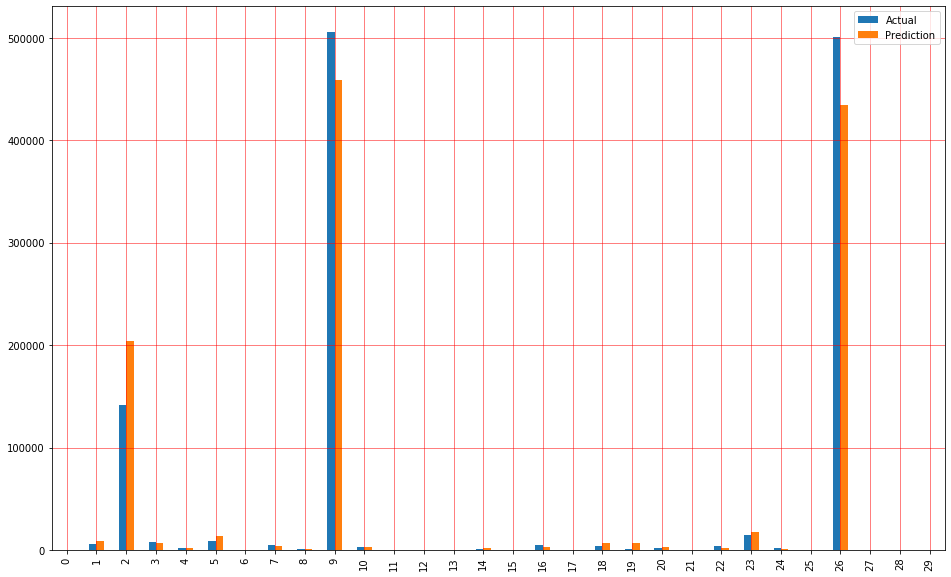

In [359]:
#visualizing the estimated and actual values

Y_test_data = Y_test.to_numpy()

graph_data = pd.DataFrame({'Actual':Y_test_data.flatten(),'Prediction':actual_prediction.flatten()})
print(graph_data)

import matplotlib.pyplot as plt

graph_data_1 = graph_data.head(30)  #considering first 30 values for graphic visualization
graph_data_1.plot(kind = 'bar',figsize =(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()